In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
import numpy as np
import cylinder_dataset_generator as cyl_generator
import dataset_generator
from mcu_experiments import MCUexperiments
from mcu_plots import MCUplots
import pickle
from mcu_original import MCUOriginalModel


In [5]:

figure_num = 10**3
figure_point_cnt = 1000
deterministic_param_scatter = False
p = 3
lw = np.array([0, -75, -75])
up = np.array([20, 75, 75])
fixed_params = {"height": 100}
seed = 123
noise_level = 0
param_names = np.array(["radius", "rotation_angle_x", "rotation_angle_y"])
control_vars = dataset_generator.get_control_vars(deterministic=deterministic_param_scatter, dimensionality=p,
                                                  size=figure_num,
                                                  lw=lw, up=up, seed=seed)
control_vars_dict = dataset_generator.put_control_vars_in_dict(control_vars, p, param_names)
figures = dataset_generator.generate_array_of_figures(control_vars_dict, cyl_generator.generate_cylinder_points,
                                                      noise_level=noise_level, min_num_points=figure_point_cnt, fixed_params=fixed_params)
mcu_model = MCUOriginalModel(k=10, c=0.1, figures=figures, params=control_vars, params_names=param_names)

In [6]:
mcu_model.train(max_iters=100, do_cliques=False, keep_mutual_only=True)
print(f"rre_median_embedding_vs_params: {mcu_model.compute_rre_median_embedding_vs_params()}")
print(f"Average number of neighbors: {mcu_model.avg_k}")

/Users/Ekaterina.Inkina/Library/Python/3.9/lib/python/site-packages/cvxpy/problems/problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


rre_median_embedding_vs_params: 0.00042843068693127807
Average number of neighbors: 9.13


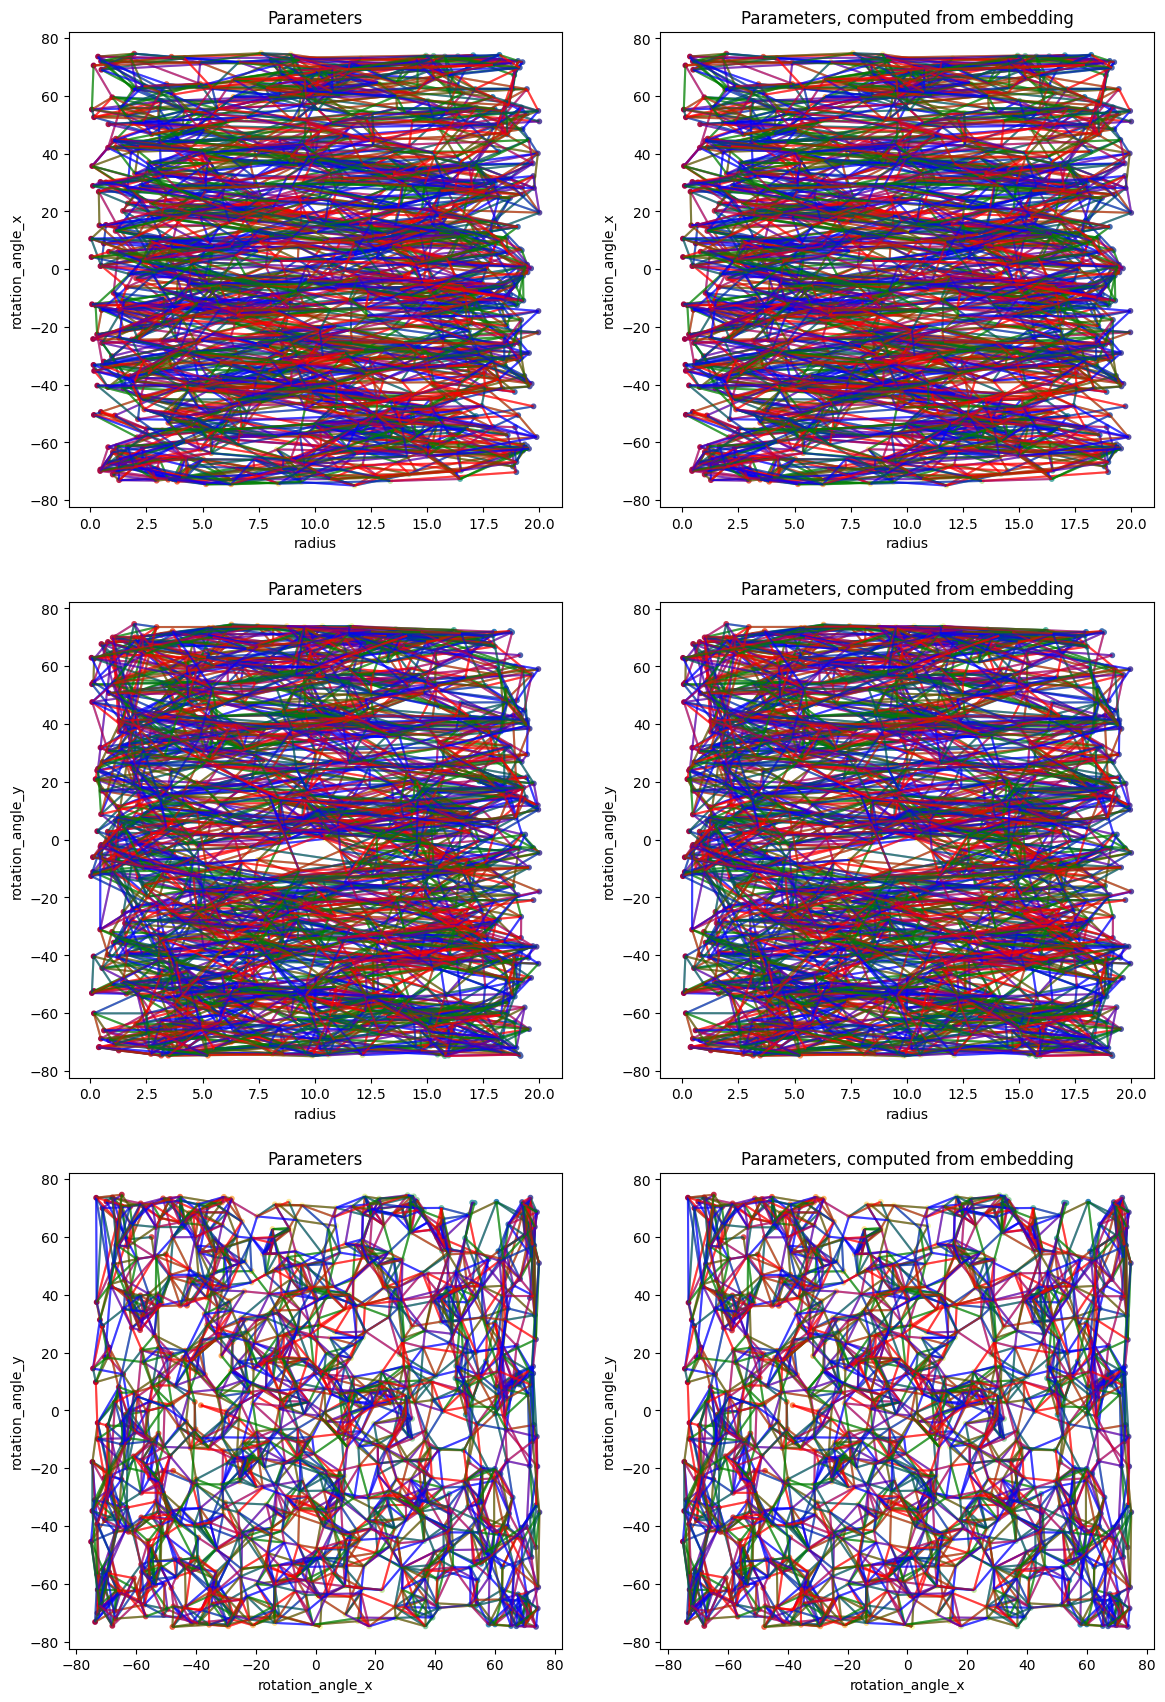

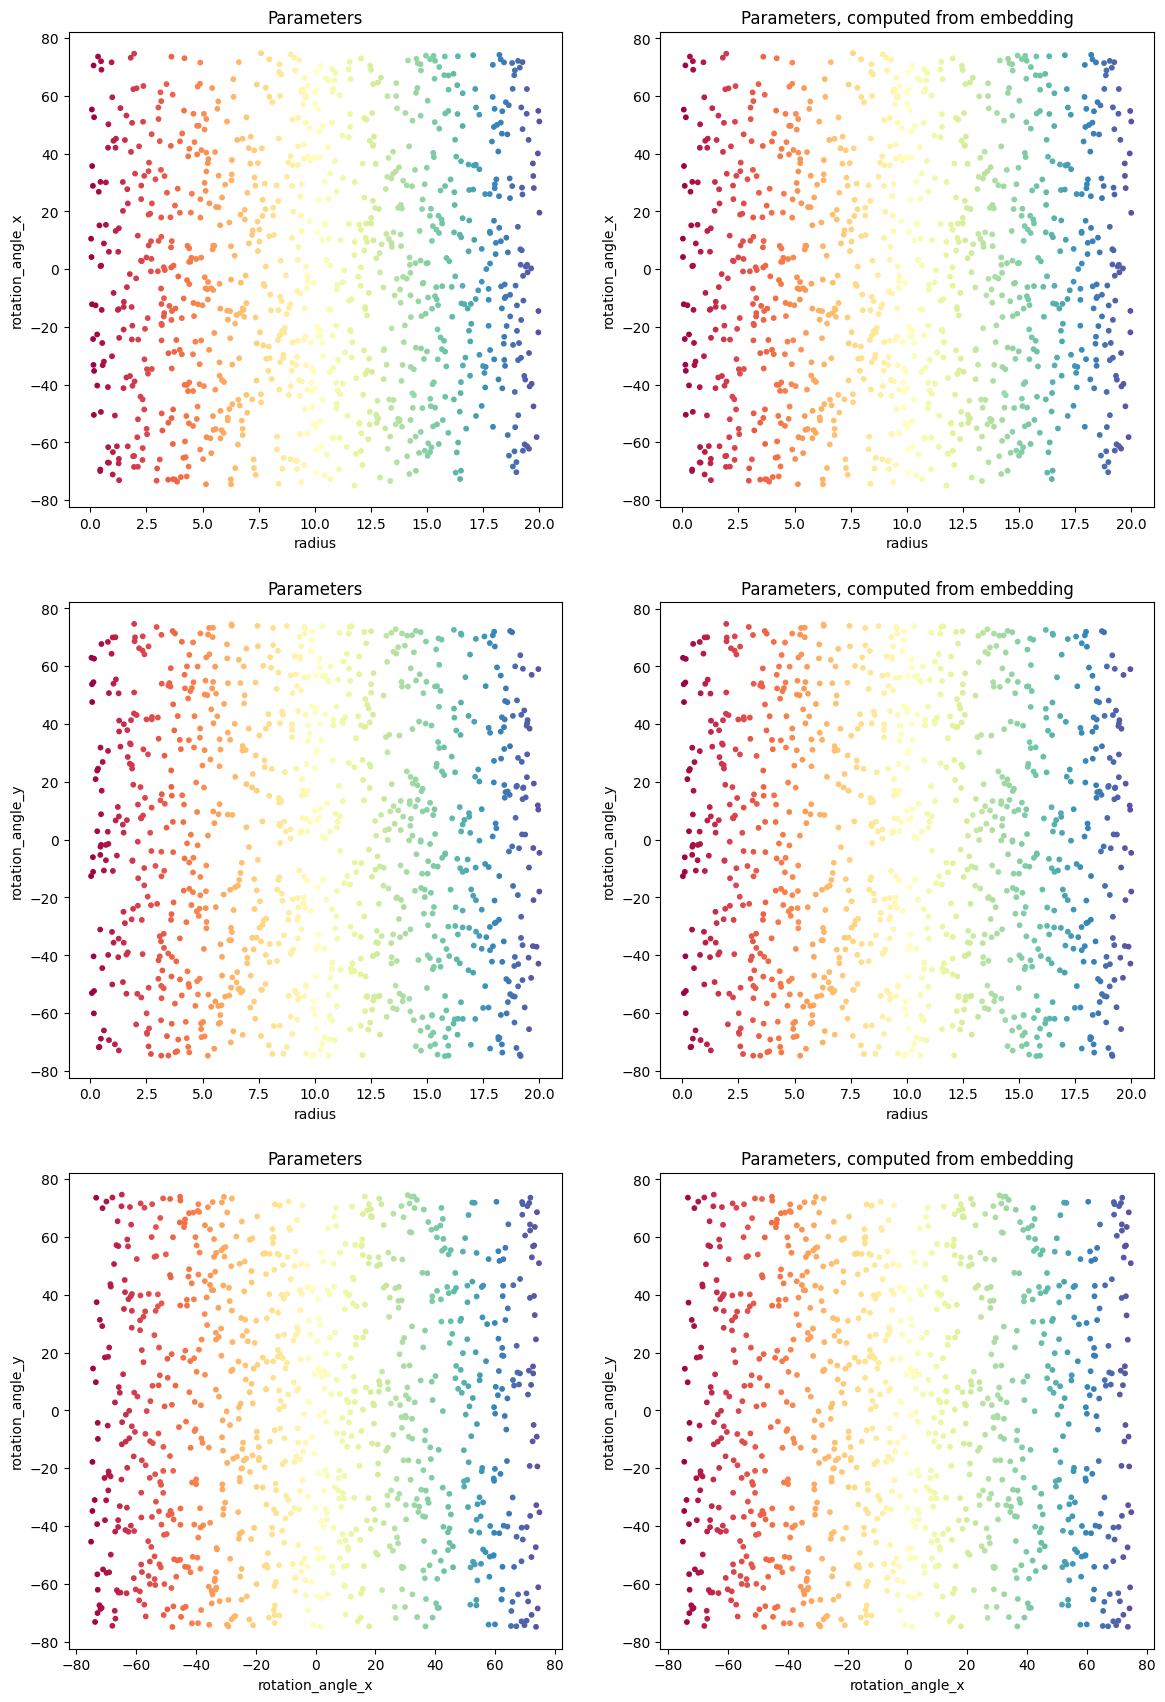

In [7]:
mcu_plots = MCUplots(mcu_model)
mcu_plots.plot_embeddings_vs_parameters(with_edges=False, annotate=False)
mcu_plots.plot_embeddings_vs_parameters(with_edges=True, annotate=False)

In [9]:
mcu_experiments = MCUexperiments(mcu_model)
k=mcu_model.k
seed = 153
interval_runs, intervals = mcu_experiments.test_predictive_optimization(lw, up, cyl_generator.generate_cylinder_points, figure_point_cnt, k=k, noise_level=0, pieces_cnt=5, test_data_size=20, same_value=False, seed=seed)

Finding neighbors: 9 ms , optimization: 1 ms
-----------
x_opt  = [  3.03676021 -60.50980839 -62.89854824], x_err = 0.08679546582147939
x_real = [  3.7407151  -58.67854585 -71.67056173]
Finding neighbors: 6 ms , optimization: 0 ms
-----------
x_opt  = [  3.12671971 -64.30353821 -48.60993562], x_err = 0.07671182224578554
x_real = [  3.42638831 -63.53528358 -46.5028821 ]
Finding neighbors: 5 ms , optimization: 0 ms
-----------
x_opt  = [  2.80012543 -59.95994166 -50.8619326 ], x_err = 0.10074594097655651
x_real = [  1.54220284 -57.5652575  -47.38753632]
Finding neighbors: 5 ms , optimization: 0 ms
-----------
x_opt  = [  2.33606001 -45.67691922 -64.17841186], x_err = 0.08761958160588583
x_real = [ 3.28108753e-02 -4.58197979e+01 -6.79941603e+01]
Finding neighbors: 5 ms , optimization: 0 ms
-----------
x_opt  = [  2.78678119 -49.68701022 -61.74283842], x_err = 0.10026264288940956
x_real = [  0.31864231 -49.80938985 -63.62271602]
Finding neighbors: 5 ms , optimization: 0 ms
-----------
x_op

In [10]:
interval_runs_base, intervals_base = mcu_experiments.test_predictive_optimization(lw, up, cyl_generator.generate_cylinder_points, figure_point_cnt, noise_level=0, pieces_cnt=5, test_data_size=20, same_value=False, baseline=True, seed = seed)

-----------
x_opt  = [  2.52811757 -57.19786706 -67.19476356], x_err = 0.1032711009221908
x_real = [  3.7407151  -58.67854585 -71.67056173]
-----------
x_opt  = [  3.09303457 -65.94461648 -40.36126248], x_err = 0.10184230808421929
x_real = [  3.42638831 -63.53528358 -46.5028821 ]
-----------
x_opt  = [  2.09210899 -58.24098903 -53.30568843], x_err = 0.11495363299002831
x_real = [  1.54220284 -57.5652575  -47.38753632]
-----------
x_opt  = [  0.47291357 -49.47276289 -68.83299715], x_err = 0.1760446960484926
x_real = [ 3.28108753e-02 -4.58197979e+01 -6.79941603e+01]
-----------
x_opt  = [  0.15967256 -50.49853152 -60.09217251], x_err = 0.24994274161695762
x_real = [  0.31864231 -49.80938985 -63.62271602]
-----------
x_opt  = [  4.25007147 -65.15417752 -63.02789714], x_err = 0.07536737985788497
x_real = [  3.36984891 -63.52214989 -72.34172653]
-----------
x_opt  = [  3.20916612 -55.89718522 -45.24876123], x_err = 0.17298541952688815
x_real = [  3.53714061 -49.14099031 -48.10303464]
------

In [ ]:
data = {
    'interval_runs': interval_runs,
    'intervals': intervals,
    'interval_runs_base': interval_runs_base
}
with open('tmp_storage/orig_cyl_3d.pkl', 'wb') as f:
    pickle.dump(data, f)


In [1]:
interval_runs.shape

NameError: name 'interval_runs' is not defined

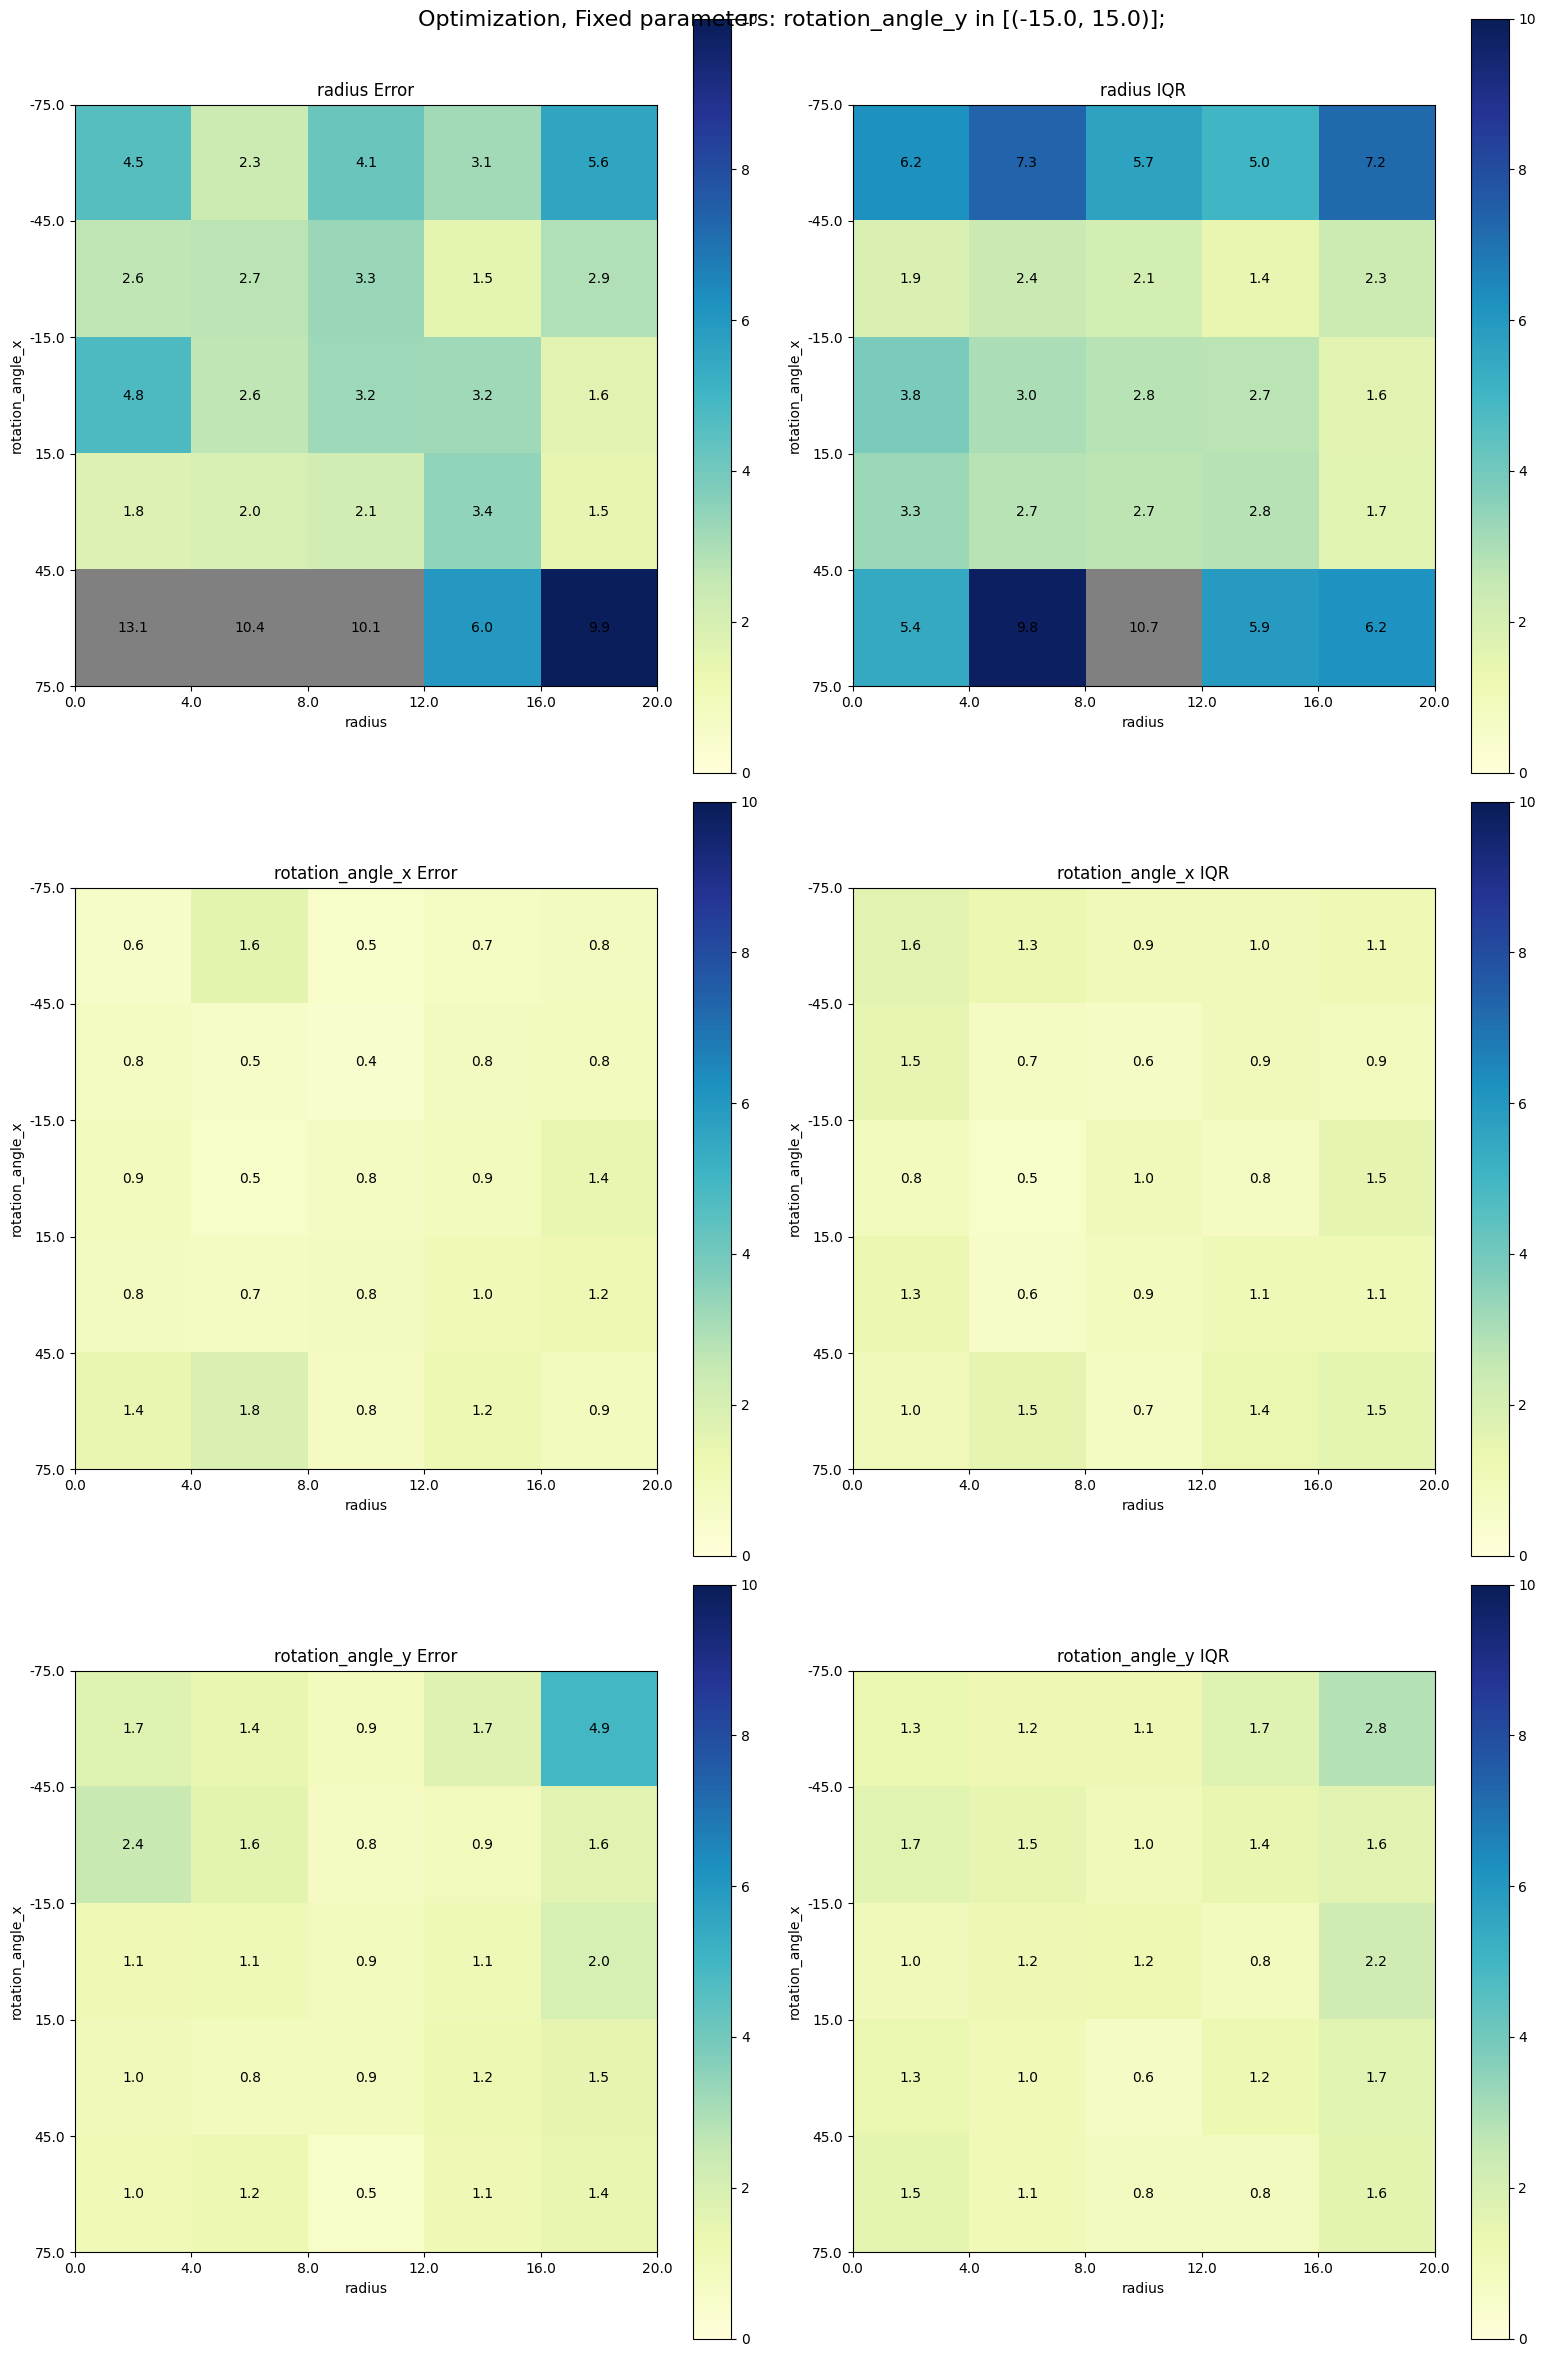

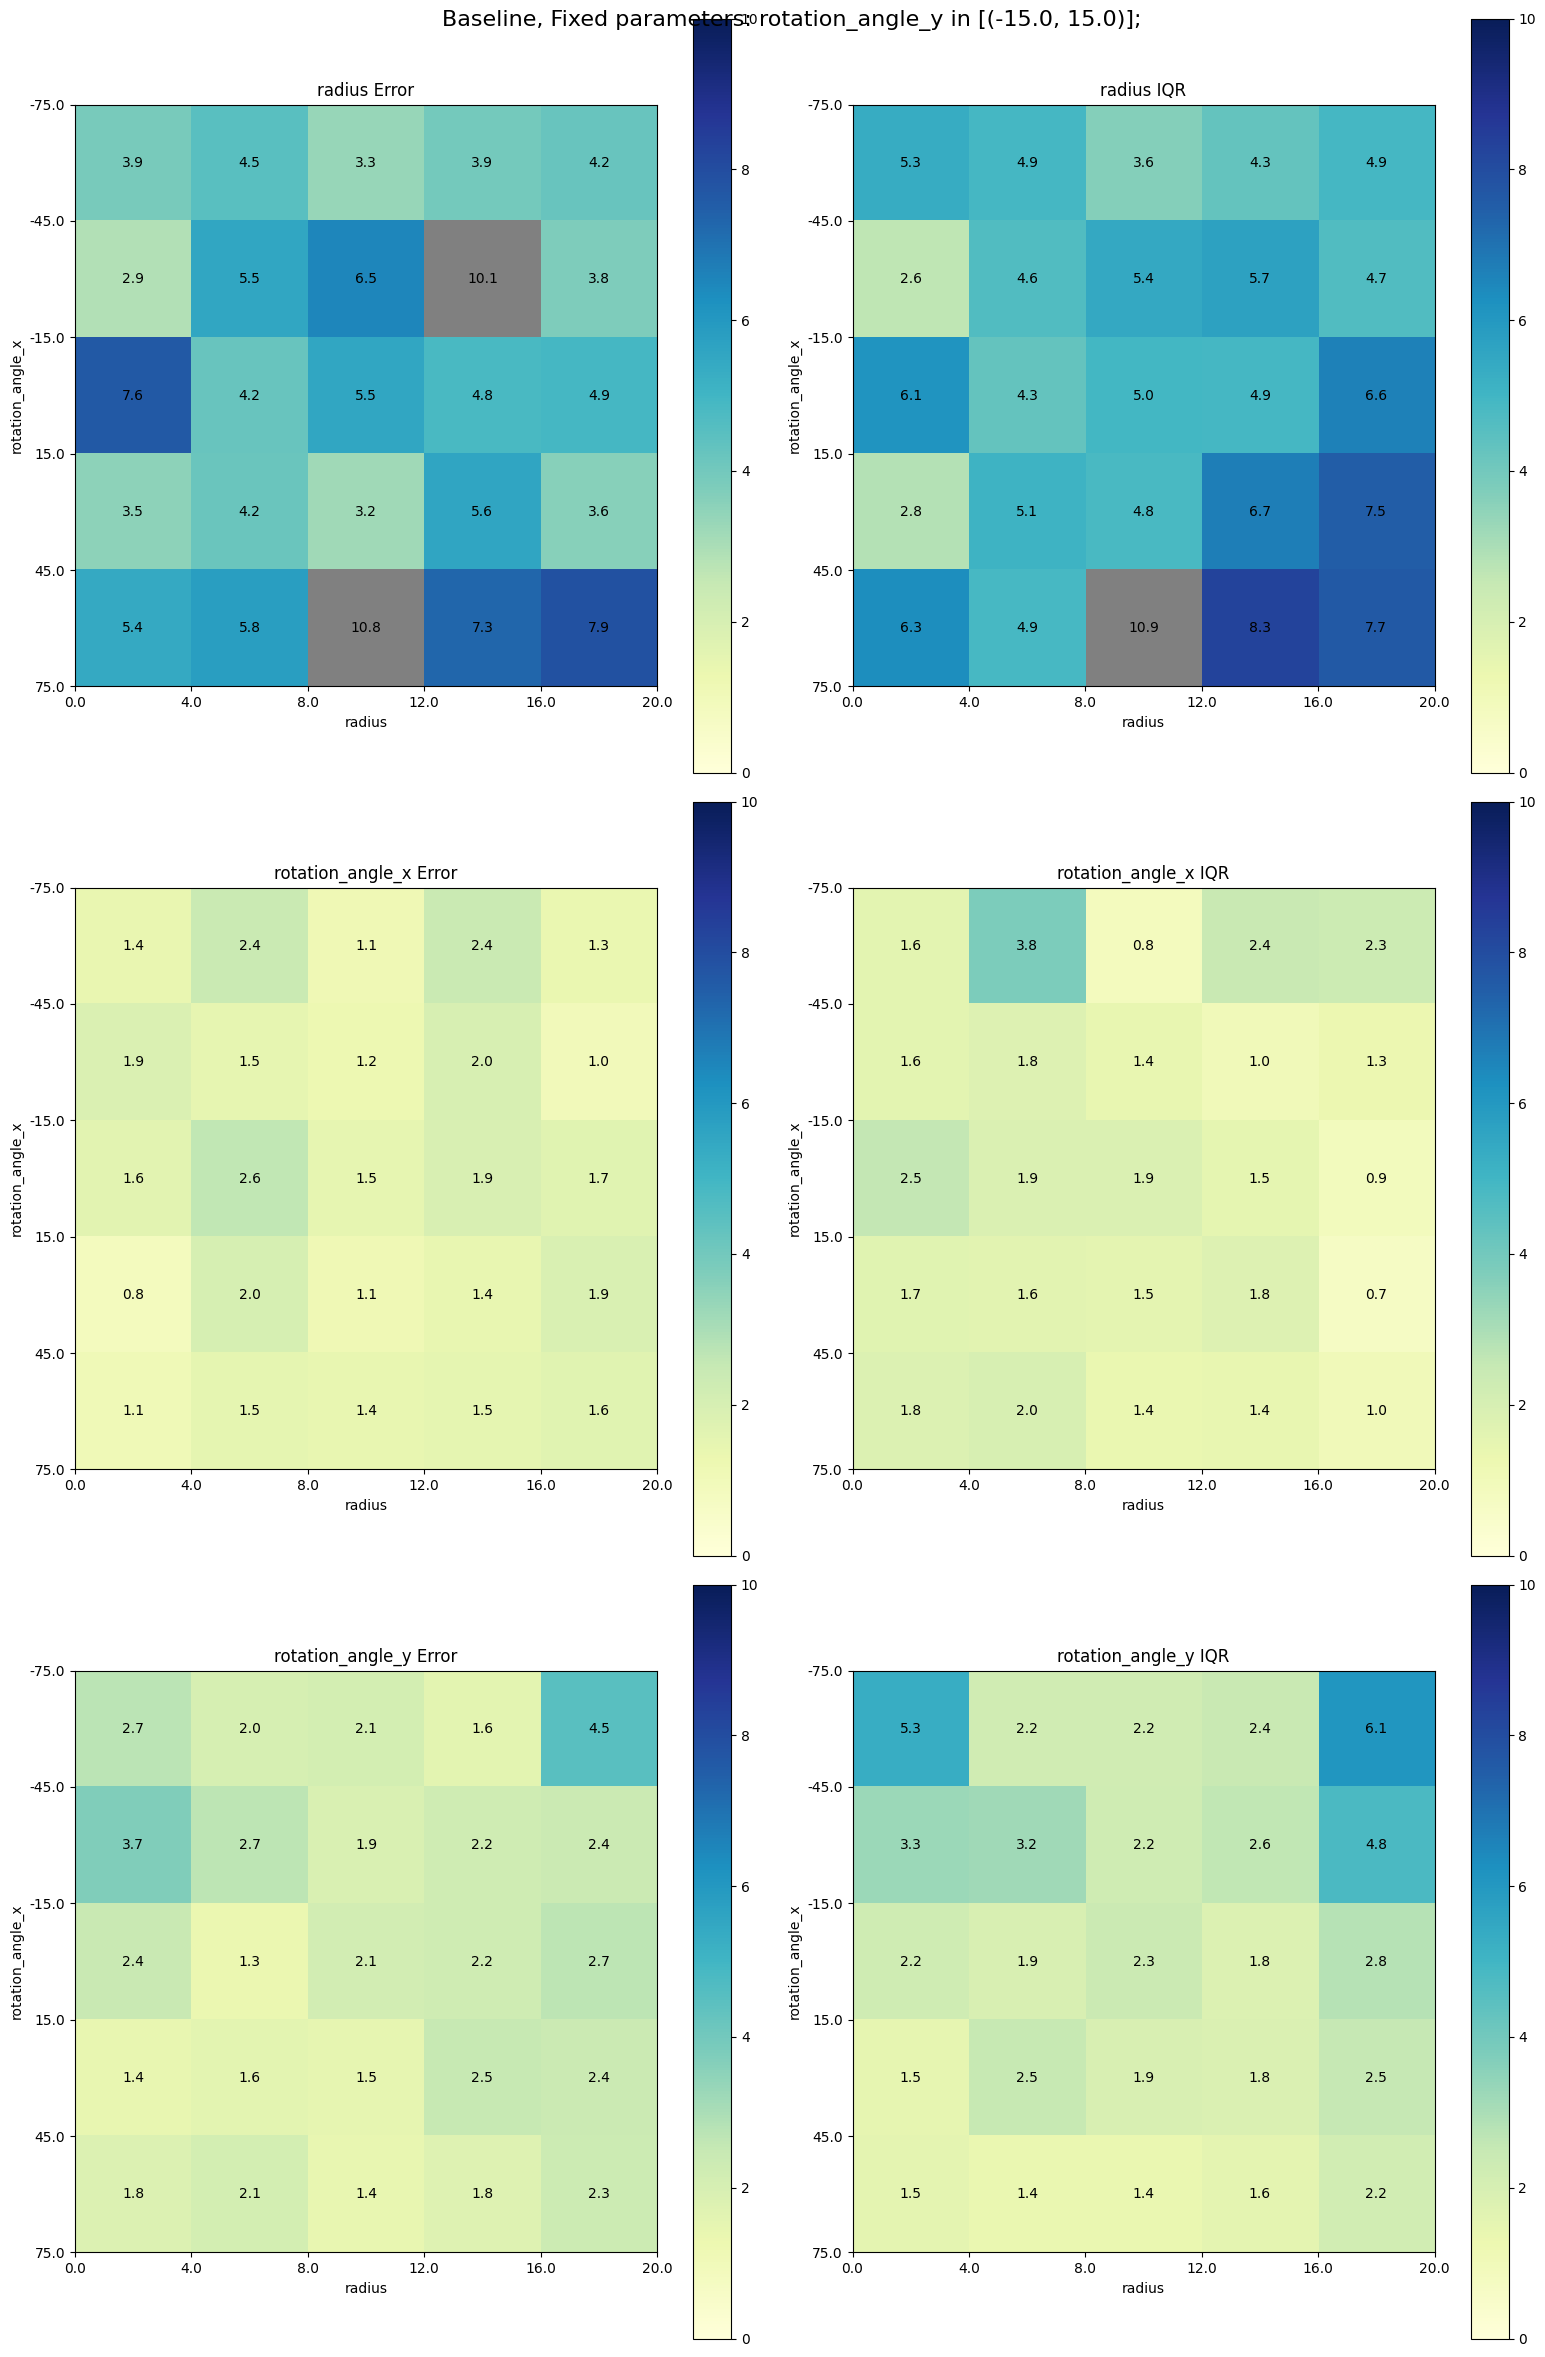

In [11]:
heatmap_lw=0
hetmap_up=10
fixed_params = {2:2}
mcu_plots.plot_2d_predictive_optimization_heatmaps(intervals, interval_runs, filename=f"images/orig_cyl_3d_{fixed_params}.png", title="Optimization", lw=heatmap_lw, up=hetmap_up, fixed_params_map=fixed_params)
mcu_plots.plot_2d_predictive_optimization_heatmaps(intervals_base, interval_runs_base, filename=f"images/orig_cyl_2d_{fixed_params}_base.png", title="Baseline", lw=heatmap_lw, up=hetmap_up, fixed_params_map=fixed_params)

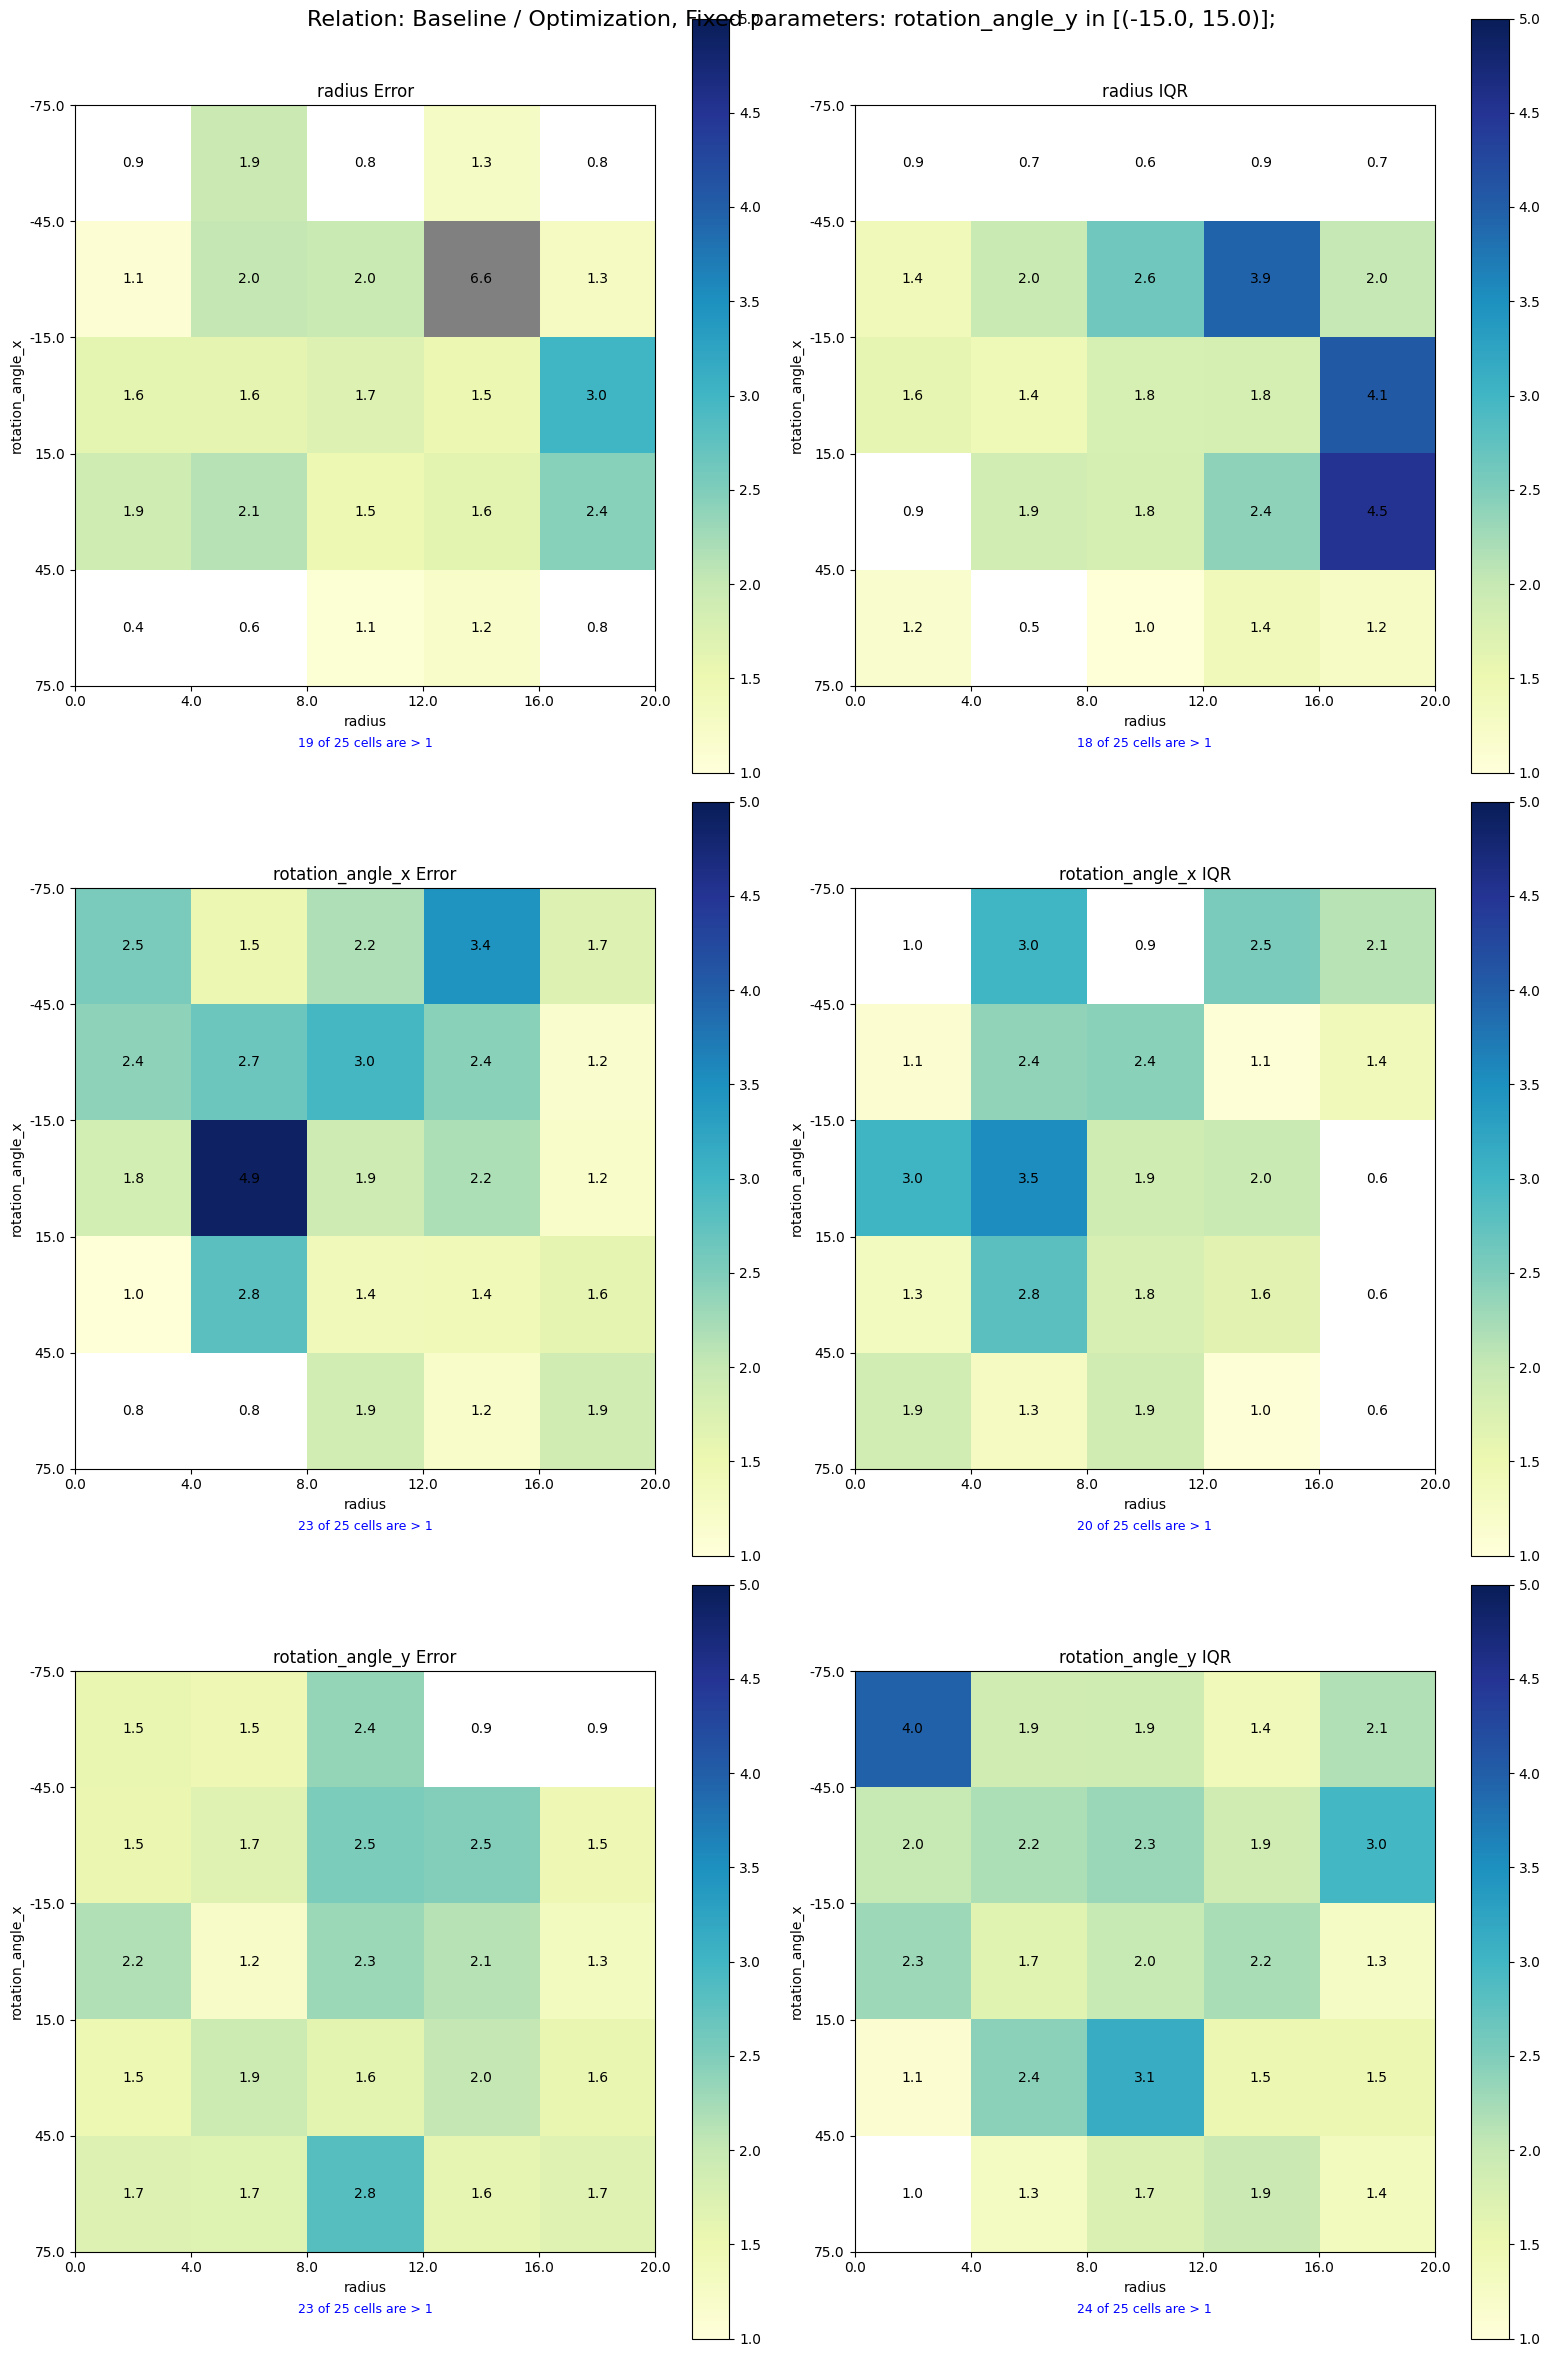

In [12]:
mcu_plots.plot_2d_predictive_optimization_heatmaps(intervals, interval_runs_base / interval_runs, filename = f"images/orig_cyl_2d_{fixed_params}_rel.png", title="Relation: Baseline / Optimization", lw=1, up=5, count_greater_then=1, fixed_params_map=fixed_params)